In [1]:
# importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data 
df = pd.read_csv('Zomato data .csv')

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
# converting rate into single value
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
df['rate'] = df['rate'].apply(handleRate)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


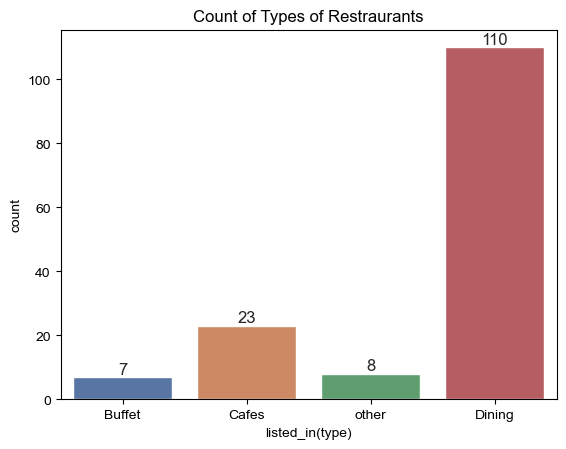

In [6]:
plt.title('Count of Types of Restraurants')
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(x= 'listed_in(type)',data = df)
ax.bar_label(ax.containers[0])
plt.show()

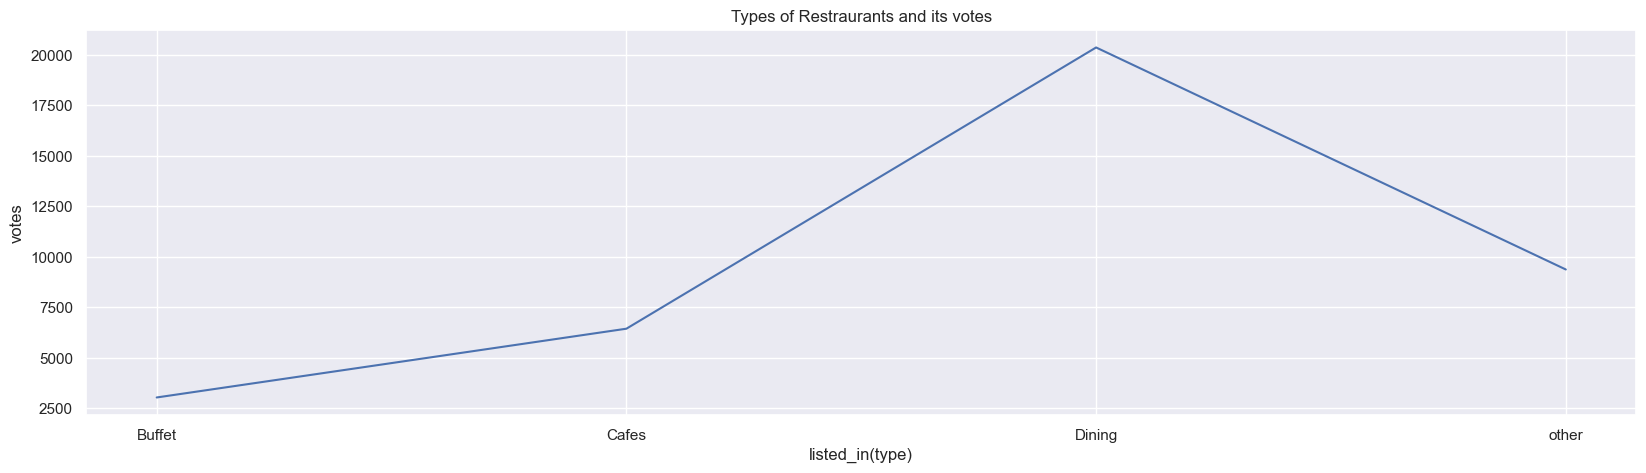

In [7]:
plt.title('Types of Restraurants and its votes')
gb = df.groupby('listed_in(type)', as_index = False)['votes'].sum()
sns.lineplot(x = 'listed_in(type)',y = 'votes',data = gb)
plt.show()

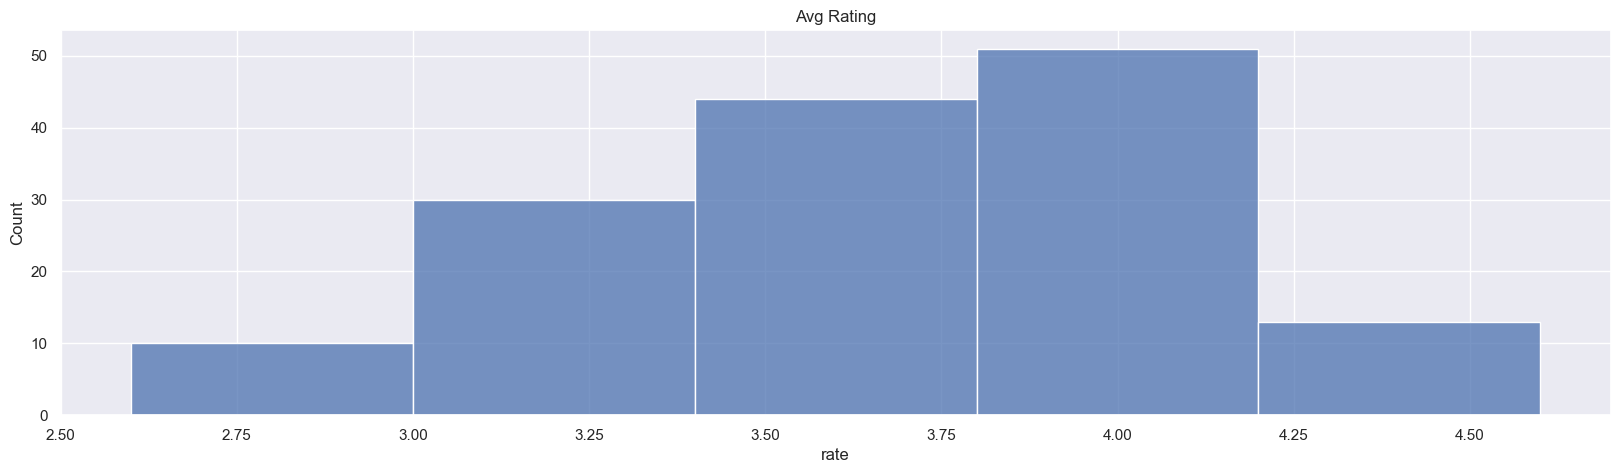

In [8]:
plt.title('Avg Rating')
sns.histplot(data = df, x = 'rate',bins=5)
plt.show()

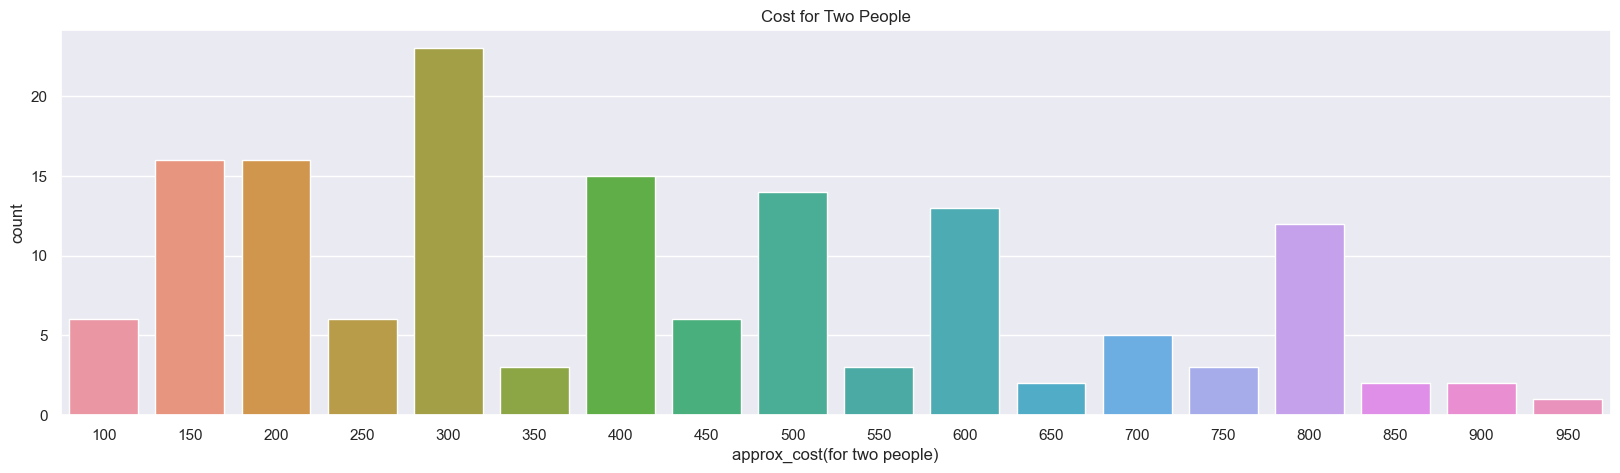

In [9]:
plt.title('Cost for Two People')
sns.countplot(x = 'approx_cost(for two people)',data = df)
plt.show()

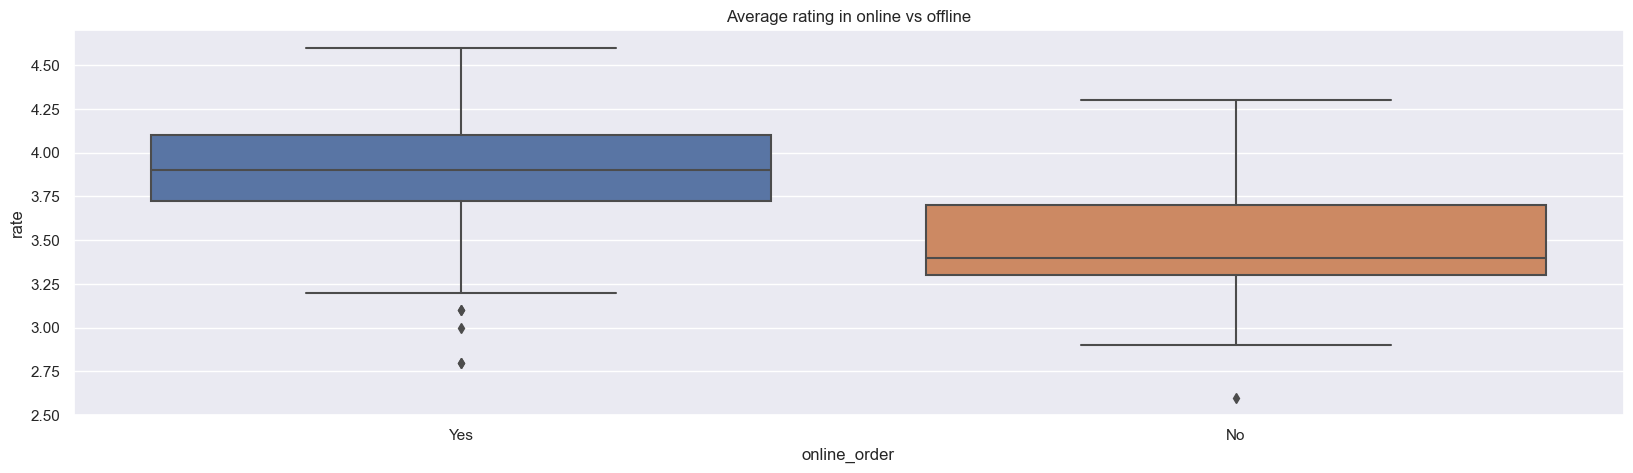

In [10]:
plt.title('Average rating in online vs offline')
sns.boxplot(x = 'online_order',y = 'rate',data = df)
plt.show()

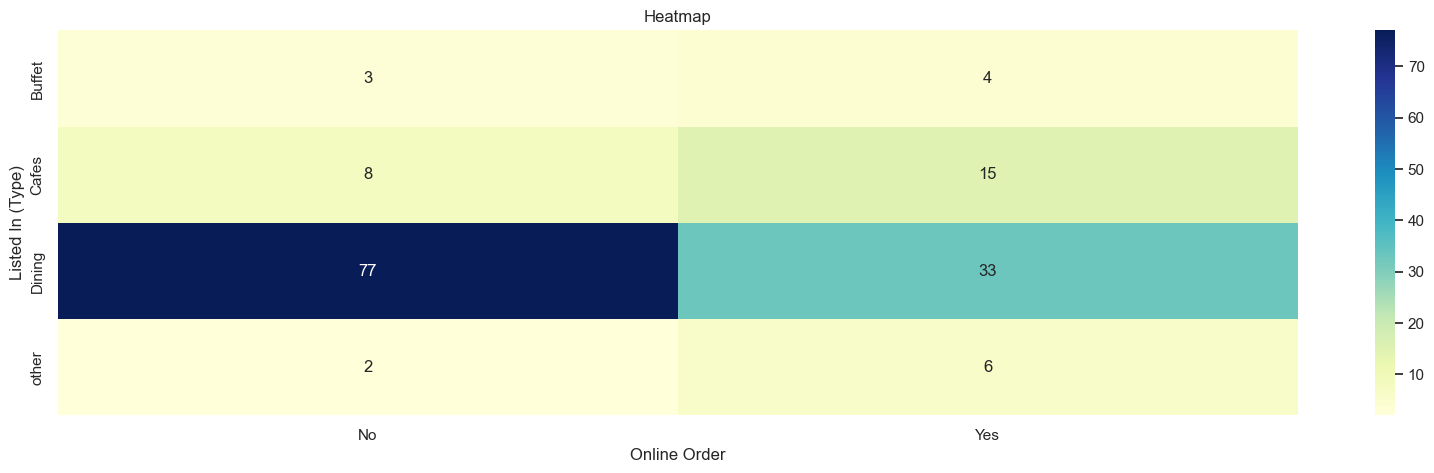

In [11]:
pivot_table = df.pivot_table(index ='listed_in(type)',columns = 'online_order',aggfunc = 'size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

## Conclusion

Dining restraurant primarily acept offline orders, whereas cages primarily receives onlin orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online orderint ar cafes